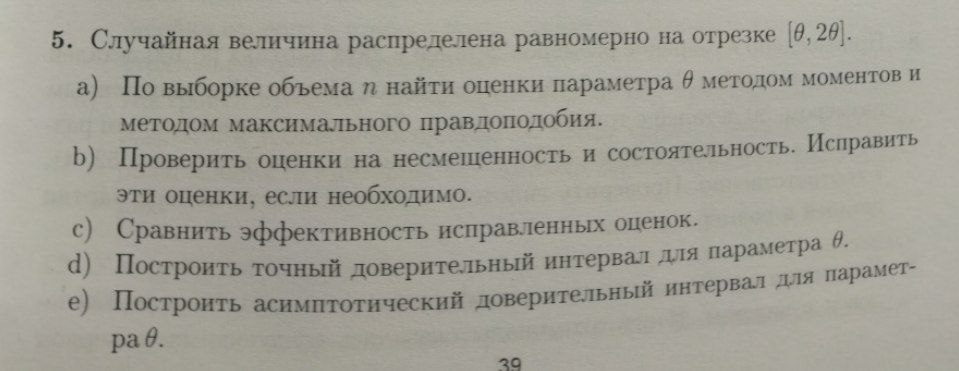

In [523]:
from IPython.display import Image

Image("images/task_5_1.jpg")

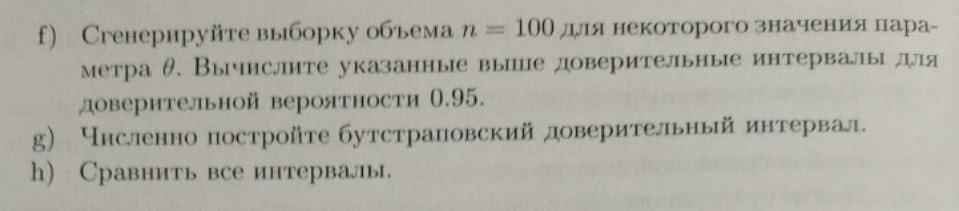

In [524]:
Image("images/task_5_2.jpg")

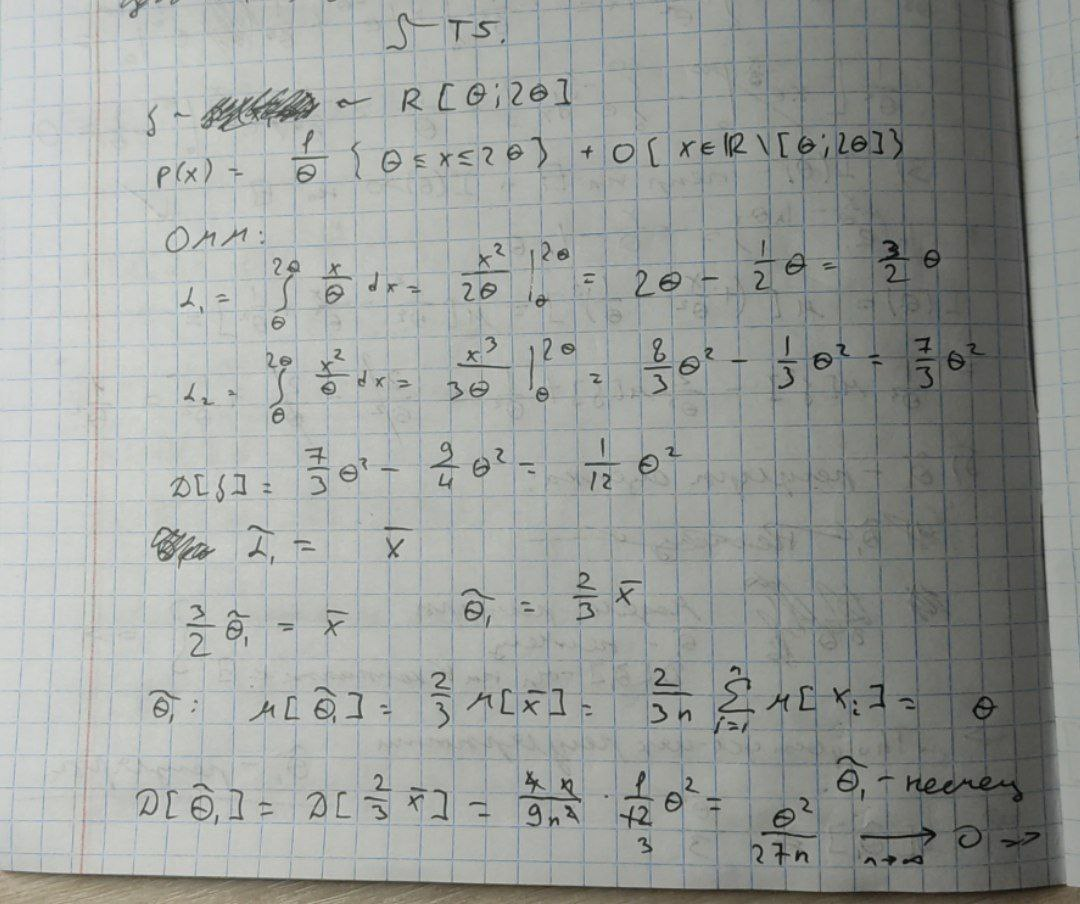

In [525]:
Image("images/answer_5_1.jpg")

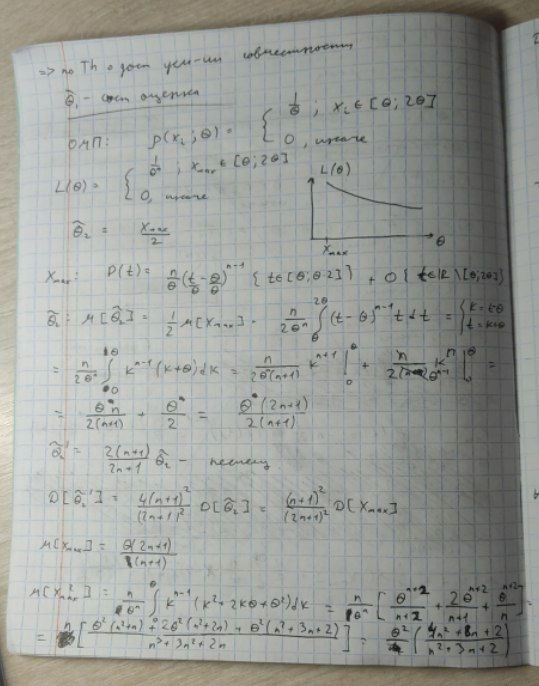

In [526]:
Image("images/answer_5_2.jpg")

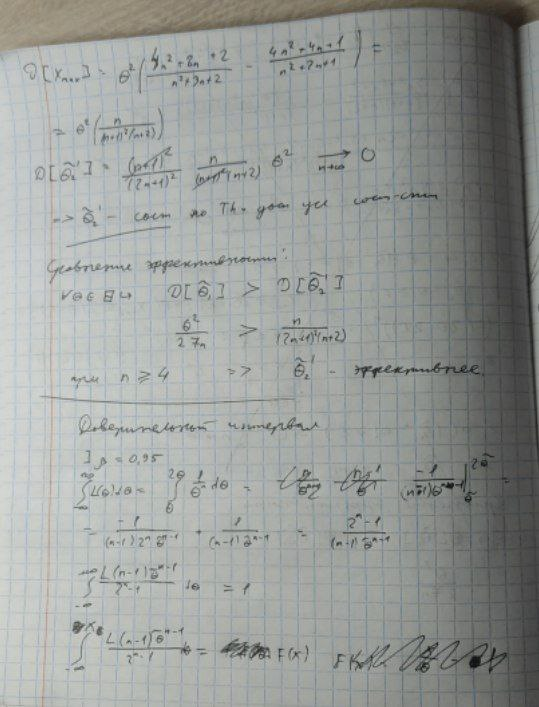

In [527]:
Image("images/answer_5_3.jpg")

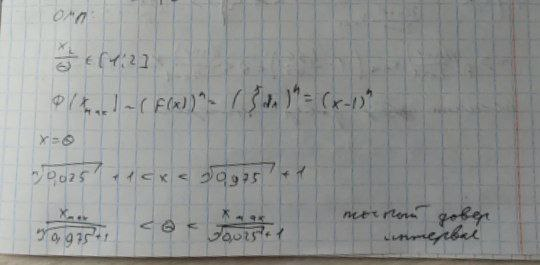

In [528]:
Image("images/answer_5_4.jpg")

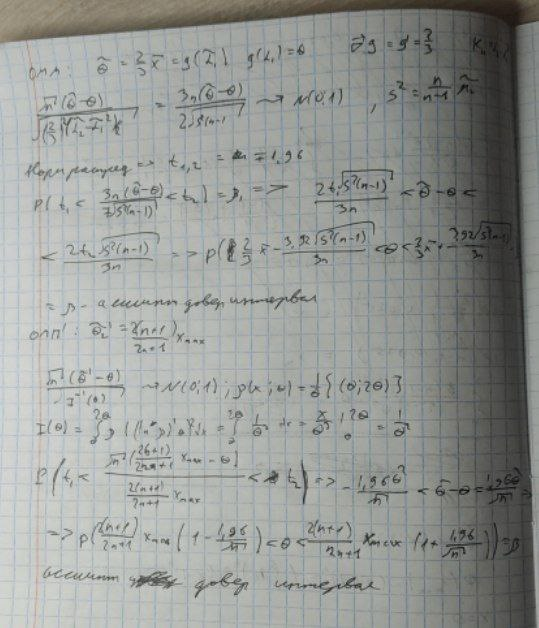

In [529]:
Image("images/answer_5_5.jpg")

In [530]:
import numpy as np
import random
import matplotlib.pyplot as plt

def p(x):
    if theta <= x <= 2 * theta:
        return 1 / theta
    else:
        return 0
    
def F(x):
    if (x <= theta):
        return 0
    elif x >= 2 * theta:
        return 1
    else:
        return (x / theta - 1)

def F_reversed(y):
    return theta * (y + 1)



n = 100
theta = 15

***f)***

In [531]:
sample = []
for i in range(n):
    sample.append(float(F_reversed(random.random())))

beta = 0.95
bord_acc_1_1 = np.max(sample) / (((1 + beta) / 2) ** (1 / n) + 1)
bord_acc_1_2 = np.max(sample) / (((1 - beta) / 2) ** (1 / n) + 1)
print(f'Точный интервал = ({bord_acc_1_1}, {bord_acc_1_2})')
print('l =',  bord_acc_1_2 - bord_acc_1_1)

t_1 = -1.96
t_2 = 1.96
theta_1 = 2 / 3 * np.mean(sample)
s = np.sqrt(np.sum([(x - np.mean(sample)) ** 2 for x in sample]) / (n - 1))

bord_assymp_1_1 = theta_1 - (t_2 * 2 * s * np.sqrt(n - 1)) / (3 * n)
bord_assymp_1_2 = theta_1 - (t_1 * 2 * s * np.sqrt(n - 1)) / (3 * n)
print(f'Асимптотический интервал = ({bord_assymp_1_1}, {bord_assymp_1_2})')
print('l =',  bord_assymp_1_2 - bord_assymp_1_1)


Точный интервал = (14.958121324739071, 15.232055363937004)
l = 0.2739340391979326
Асимптотический интервал = (14.834905859592615, 15.841325423187508)
l = 1.0064195635948927


***g)***

In [ ]:
bst = 1000
estimation = (n + 1) / (2 * n + 1) * np.max(sample)
delta = []
for i in range(bst):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_theta = (n + 1) / (2 * n + 1) * np.max(bootstrap_sample)
    delta.append(bootstrap_theta - estimation)
delta.sort()
t_1 = delta[int(bst * (1 - beta) / 2)]
t_2 = delta[int(bst * (1 + beta) / 2)]
bord_boots_1_1 = -(t_1 - estimation)
bord_boots_1_2 = -(t_2 - estimation)
print(f'Бутстрап интервал = ({bord_boots_1_1}, {bord_boots_1_2})')
print('l =', bord_boots_1_2 - bord_boots_1_1)

Бутстрап интервал = (15.52913373442366, 15.030637124879618)
l = -0.4984966095440413


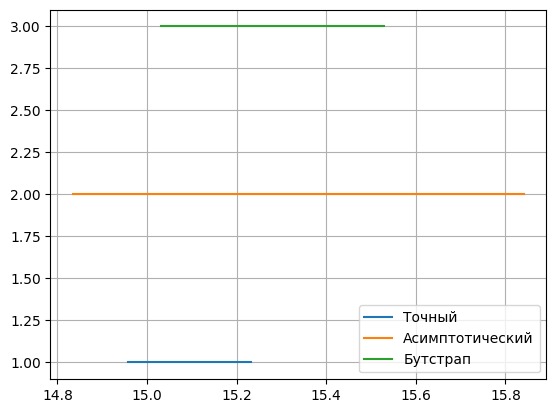

In [541]:
x1 = np.linspace(bord_acc_1_1, bord_acc_1_2, 2)
y1 = [1] * 2

x2 = np.linspace(bord_assymp_1_1, bord_assymp_1_2, 2)
y2 = [2] * 2

x3 = np.linspace(bord_boots_1_1, bord_boots_1_2, 2)
y3 = [3] * 2

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.grid("on")

plt.legend(["Точный", "Асимптотический", "Бутстрап"])

plt.show()